<a href="https://colab.research.google.com/github/fln495/bigdata/blob/master/%E3%80%8Ctextmining_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("rJava")
install.packages("jiebaR")
install.packages("tmcn")
install.packages("dplyr")
install.packages("lubridate")
install.packages("stringr")
install.packages("wordcloud")
install.packages("Rwordseg", repos = "http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘jiebaRD’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is not available”
Warning message in install.packages("Rwordseg", repos = "http://R-Forge.R-project.org"):
“installation of package ‘Rwordseg’ had non-zero exit status”


In [13]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)

In [18]:
content <- "嚴重特殊傳染性肺炎疫情持續在全球蔓延,已造成三千多萬人感染,死亡人數破百萬人,歐美醫療體系幾近崩潰,各種行動限制對於各國之經濟更有莫大之衝擊。
然而台灣未實行大規模封鎖行動,維持正常上班上課與各種經濟活動,至今無大規模疫情爆發,醫療體系也仍能正常提供民眾服務,顯示台灣的防疫政策正確而有效,
獲得世界各國高度肯定。國家衛生研究院群體健康科學研究所與感染症與疫苗研究所合作,利用真實數據與數學模型證實,良好的邊境管控,詳盡的疫情調查,
確實的隔離與檢疫,以及民眾遵行防疫措施,為台灣抗疫四大支柱。台灣也對世界各國提供各項協助與經驗分享,期望幫助各國盡快從疫情的陰霾中走出。"
cutter <- worker(bylines = F)

In [20]:
cutter[content]

[1] "嚴重"           "特殊"           "傳染性"         "肺炎"          
  [5] "疫情"           "持續"           "在"             "全球"          
  [9] "蔓延"           "已"             "造成"           "三千多萬"      
 [13] "人"             "感染"           "死亡"           "人數"          
 [17] "破"             "百萬"           "人"             "歐美"          
 [21] "醫療"           "體系"           "幾近"           "崩潰"          
 [25] "各種"           "行動"           "限制"           "對於"          
 [29] "各國"           "之"             "經濟"           "更"            
 [33] "有"             "莫大"           "之"             "衝擊"          
 [37] "然而"           "台灣"           "未"             "實行"          
 [41] "大規模"         "封鎖"           "行動"           "維持"          
 [45] "正常"           "上班"           "上課"           "與"            
 [49] "各種"           "經濟"           "活動"           "至今"          
 [53] "無"             "大規模"         "疫情"           "爆發"          
 [57] "醫療"           "體系"           "也"             "仍"            
 [61] "能"             "正常"           "提供"           "民眾"          
 [65] "服務"           "顯示"           "台灣"           "的"            
 [69] "防疫"           "政策"           "正確"           "而"            
 [73] "有效"           "獲得"           "世界"           "各國"          
 [77] "高度肯定"       "國家衛生研究院" "群體"           "健康"          
 [81] "科學"           "研究所"         "與"             "感染"          
 [85] "症"             "與"             "疫苗"           "研究所"        
 [89] "合作"           "利用"           "真實"           "數據"          
 [93] "與"             "數學模型"       "證實"           "良好"          
 [97] "的"             "邊境"           "管控"           "詳盡"          
[101] "的"             "疫情"           "調查"           "確實"          
[105] "的"             "隔離"           "與"             "檢疫"          
[109] "以及"           "民眾"           "遵行"           "防疫"          
[113] "措施"           "為"             "台灣"           "抗疫"          
[117] "四大"           "支柱"           "台灣"           "也"            
[121] "對"             "世界"           "各國"           "提供"          
[125] "各項"           "協助"           "與"             "經驗"          
[129] "分享"           "期望"           "幫助"           "各國"          
[133] "盡快"           "從"             "疫情"           "的"            
[137] "陰霾"           "中"             "走出"

In [52]:
new_words <- c("傳染性肺炎","醫療體系","防疫措施","世界各國")
for (i in 1:length(new_words)){
  new_user_word(cutter, new_words[i])
}
content <- str_remove_all(content, "[0-9a-zA-Z]+?")
cutter[content]

[1] "嚴重"           "特殊"           "傳染性肺炎"     "疫情"          
  [5] "持續"           "全球"           "蔓延"           "造成"          
  [9] "三千多萬"       "感染"           "死亡"           "人數"          
 [13] "百萬"           "歐美"           "醫療體系"       "幾近"          
 [17] "崩潰"           "各種"           "行動"           "限制"          
 [21] "對於"           "各國"           "經濟"           "莫大"          
 [25] "衝擊"           "然而"           "台灣"           "實行"          
 [29] "大規模"         "封鎖"           "行動"           "維持"          
 [33] "正常"           "上班"           "上課"           "各種"          
 [37] "經濟"           "活動"           "至今"           "大規模"        
 [41] "疫情"           "爆發"           "醫療體系"       "正常"          
 [45] "提供"           "民眾"           "服務"           "顯示"          
 [49] "台灣"           "防疫"           "政策"           "正確"          
 [53] "有效"           "獲得"           "世界各國"       "高度肯定"      
 [57] "國家衛生研究院" "群體"           "健康"           "科學"          
 [61] "研究所"         "感染"           "疫苗"           "研究所"        
 [65] "合作"           "利用"           "真實"           "數據"          
 [69] "數學模型"       "證實"           "良好"           "邊境"          
 [73] "管控"           "詳盡"           "疫情"           "調查"          
 [77] "確實"           "隔離"           "檢疫"           "以及"          
 [81] "民眾"           "遵行"           "防疫措施"       "台灣"          
 [85] "抗疫"           "四大"           "支柱"           "台灣"          
 [89] "世界各國"       "提供"           "各項"           "協助"          
 [93] "經驗"           "分享"           "期望"           "幫助"          
 [97] "各國"           "盡快"           "疫情"           "陰霾"          
[101] "走出"

In [32]:
new_words <- c("傳染性肺炎","醫療體系","防疫措施","世界各國")
writeLines(new_words,"new_words.txt")

stop_words <- c("在","之","更","個","未","而","也","的","與","從","中","人","已","仍","能","有","為","對","症","無","破")
writeLines(stop_words, "stop_words.txt")

cutter <- worker(user = "new_words.txt", stop_word ="stop_words.txt",
bylines = FALSE )
seg_words <- cutter[content]
seg_words

[1] "嚴重"           "特殊"           "傳染性肺炎"     "疫情"          
  [5] "持續"           "全球"           "蔓延"           "造成"          
  [9] "三千多萬"       "感染"           "死亡"           "人數"          
 [13] "百萬"           "歐美"           "醫療體系"       "幾近"          
 [17] "崩潰"           "各種"           "行動"           "限制"          
 [21] "對於"           "各國"           "經濟"           "莫大"          
 [25] "衝擊"           "然而"           "台灣"           "實行"          
 [29] "大規模"         "封鎖"           "行動"           "維持"          
 [33] "正常"           "上班"           "上課"           "各種"          
 [37] "經濟"           "活動"           "至今"           "大規模"        
 [41] "疫情"           "爆發"           "醫療體系"       "正常"          
 [45] "提供"           "民眾"           "服務"           "顯示"          
 [49] "台灣"           "防疫"           "政策"           "正確"          
 [53] "有效"           "獲得"           "世界各國"       "高度肯定"      
 [57] "國家衛生研究院" "群體"           "健康"           "科學"          
 [61] "研究所"         "感染"           "疫苗"           "研究所"        
 [65] "合作"           "利用"           "真實"           "數據"          
 [69] "數學模型"       "證實"           "良好"           "邊境"          
 [73] "管控"           "詳盡"           "疫情"           "調查"          
 [77] "確實"           "隔離"           "檢疫"           "以及"          
 [81] "民眾"           "遵行"           "防疫措施"       "台灣"          
 [85] "抗疫"           "四大"           "支柱"           "台灣"          
 [89] "世界各國"       "提供"           "各項"           "協助"          
 [93] "經驗"           "分享"           "期望"           "幫助"          
 [97] "各國"           "盡快"           "疫情"           "陰霾"          
[101] "走出"

In [33]:
txt_freq <- freq(seg_words)
txt_freq <- arrange(txt_freq, desc(freq))
head(txt_freq)

,char,freq
,<chr>,<dbl>
1,台灣,4
2,疫情,4
3,經濟,2
4,各國,2
5,行動,2
6,各種,2


In [46]:
install.packages("showtext")
library(showtext)
showtext.auto(enable = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strheight(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'sans' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strwidth(words[i], cex = size[i], ...):


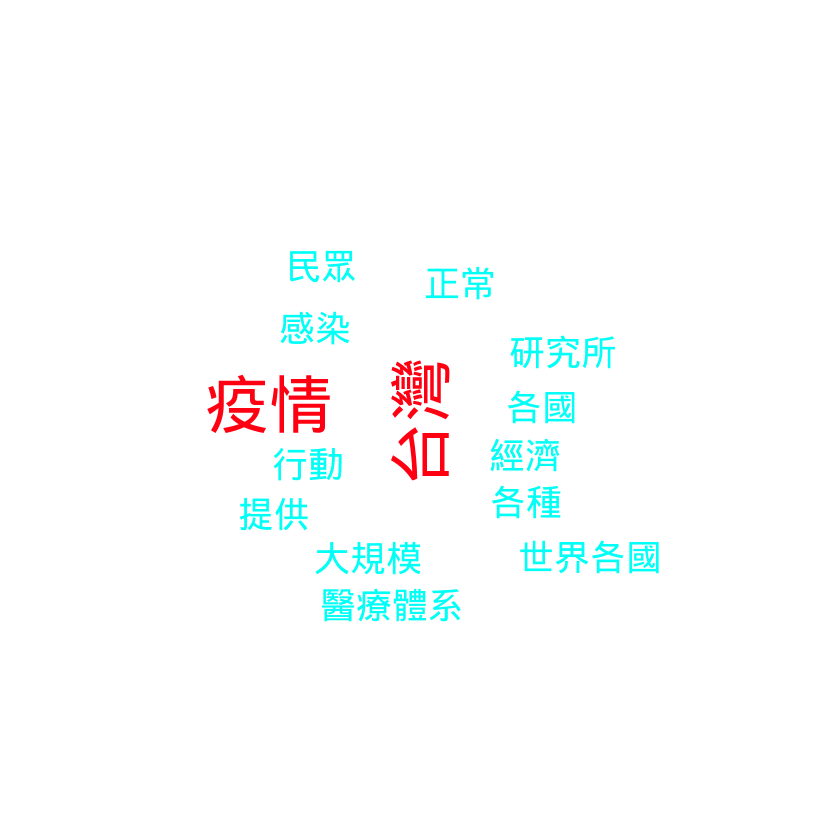

In [51]:
par(family=("Microsoft YaHei"))
wordcloud(txt_freq$char, txt_freq$freq, min.freq = 2,random.order = F,
ordered.colors = F, colors = rainbow(nrow(txt_freq)))